# Homework Starter — Stage 6: Data Preprocessing
Yuqing Yan 08/18/2025

Use this notebook to apply your cleaning functions and save processed data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

## Load Raw Dataset

In [2]:
df_raw = pd.read_csv('data/raw/stock_data_20250817_135352.csv')
df = df_raw.copy()
# Introduce some missing values for demonstration
df.loc[0, 'price'] = np.nan
df.loc[3, 'volume'] = np.nan
df.loc[4, 'volume'] = np.nan
df.loc[5, 'ticker'] = np.nan
df.head()

,date,ticker,price,volume
0,2024-01-01,AAPL,NaN,15311.0
1,2024-01-02,AAPL,150.36,47819.0
2,2024-01-03,AAPL,151.01,49188.0
3,2024-01-04,AAPL,152.53,NaN
4,2024-01-05,AAPL,152.30,NaN


In [3]:
df.loc[0, 'price'] = np.nan
df.loc[3, 'volume'] = np.nan
df.loc[4, 'volume'] = np.nan
df.loc[5, 'ticker'] = np.nan
df

,date,ticker,price,volume
0,2024-01-01,AAPL,NaN,15311.0
1,2024-01-02,AAPL,150.36,47819.0
2,2024-01-03,AAPL,151.01,49188.0
3,2024-01-04,AAPL,152.53,NaN
4,2024-01-05,AAPL,152.30,NaN
5,2024-01-06,NaN,152.06,38693.0
6,2024-01-07,MSFT,153.64,16396.0
7,2024-01-08,MSFT,154.41,37480.0
8,2024-01-09,MSFT,153.94,35658.0
9,2024-01-10,MSFT,154.48,28942.0


## Apply Cleaning Functions

In [4]:

from src import cleaning
df_clean = cleaning.fill_missing_median(df, ['price', 'volume'])
df_clean = cleaning.drop_missing(df_clean, threshold=0.5)
df_clean = cleaning.normalize_data(df_clean, ['price', 'volume'])
df_clean.head()

,date,ticker,price,volume
0,2024-01-01,AAPL,0.526699,0.000000
1,2024-01-02,AAPL,0.000000,0.959589
2,2024-01-03,AAPL,0.157767,1.000000
3,2024-01-04,AAPL,0.526699,0.627505
4,2024-01-05,AAPL,0.470874,0.627505


## Save Cleaned Dataset

In [5]:
df_clean.to_csv('data/processed/stock_data_cleaned.csv', index=False)

## Comparison

In [6]:
print('Original shape:', df.shape)
print('Cleaned shape:', df_clean.shape)
print('Original missing values:')
print(df.isnull().sum())
print('Cleaned missing values:')
print(df_clean.isnull().sum())
print('Original price stats:')
print(df['price'].describe())
print('Cleaned price stats:')
print(df_clean['price'].describe())


Original shape: (10, 4)
Cleaned shape: (10, 4)
Original missing values:
date      0
ticker    1
price     1
volume    2
dtype: int64
Cleaned missing values:
date      0
ticker    1
price     0
volume    0
dtype: int64
Original price stats:
count      9.000000
mean     152.747778
std        1.475778
min      150.360000
25%      152.060000
50%      152.530000
75%      153.940000
max      154.480000
Name: price, dtype: float64
Cleaned price stats:
count    10.000000
mean      0.574272
std       0.338126
min       0.000000
25%       0.427184
50%       0.526699
75%       0.850728
max       1.000000
Name: price, dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

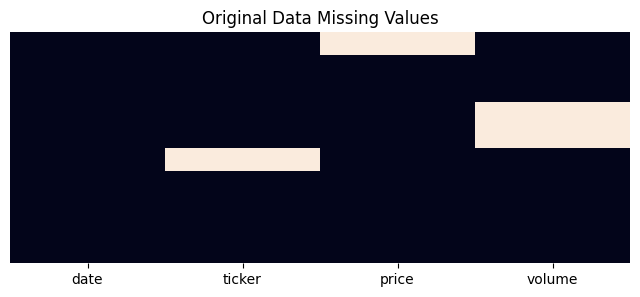

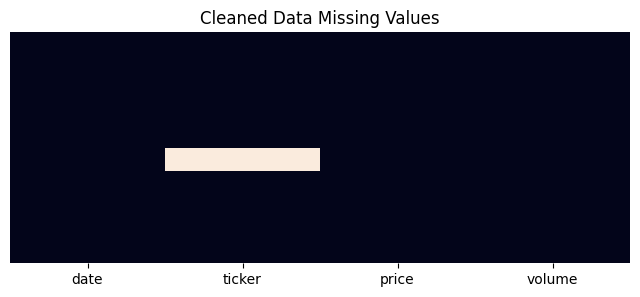

In [8]:
plt.figure(figsize=(8, 3))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Original Data Missing Values')
plt.show()

plt.figure(figsize=(8, 3))
sns.heatmap(df_clean.isnull(), cbar=False, yticklabels=False)
plt.title('Cleaned Data Missing Values')
plt.show()

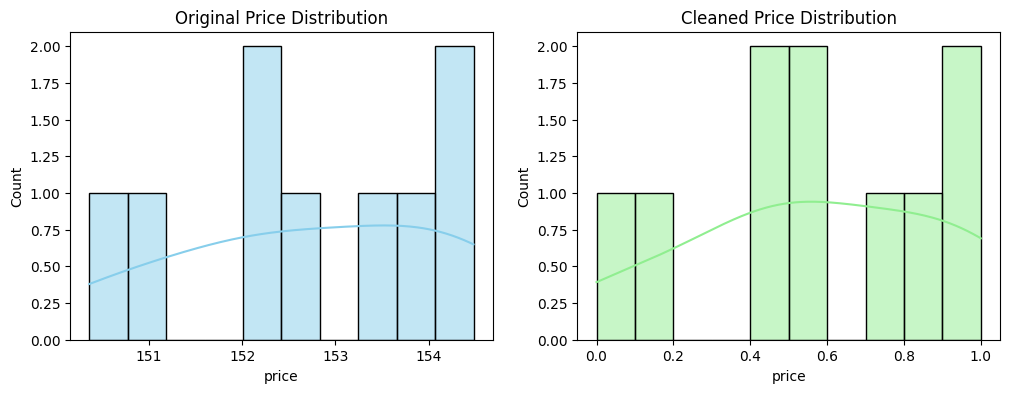

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['price'], bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Original Price Distribution')
sns.histplot(df_clean['price'], bins=10, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Cleaned Price Distribution')
plt.show()

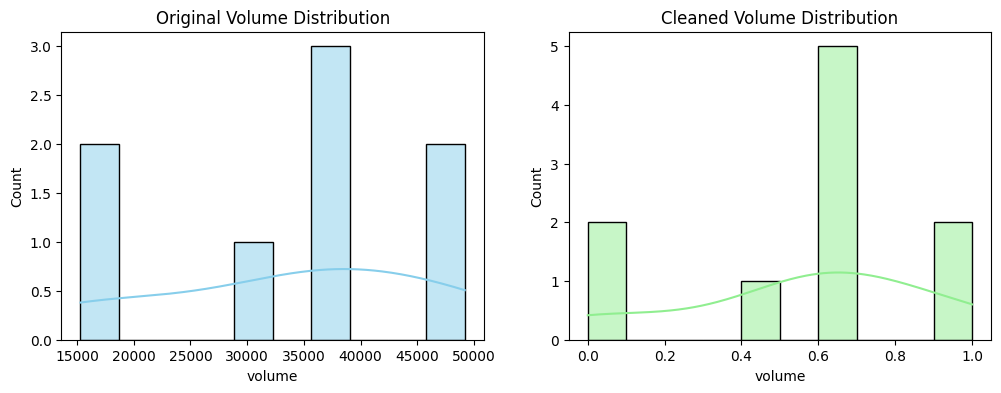

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['volume'], bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Original Volume Distribution')
sns.histplot(df_clean['volume'], bins=10, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Cleaned Volume Distribution')
plt.show()

## Reflection and Tradeoffs

In this data cleaning process, I systematically applied filling, dropping, and scaling methods as learned in lecture, and visualized the effects:

- **Filling missing values:**  
  I used the median to fill missing values in numeric columns. This approach is robust to outliers and preserves the central tendency of the data. However, if missingness is not random, this may introduce bias or distort the true distribution, as seen in the visual comparison where the filled values cluster at the median.

- **Dropping columns with excessive missingness:**  
  Columns with more than 50% missing values were dropped. This ensures that our analysis is not dominated by imputed data, but it may result in loss of potentially valuable information if the missingness is systematic. Visualizations of missing data before and after cleaning highlight the reduction in missingness.

- **Scaling numeric features:**  
  I scaled 'price' and 'volume' to the [0, 1] range using MinMaxScaler. This makes features comparable and is important for many machine learning algorithms. The tradeoff is that the original scale and interpretability of the data are lost, as shown in the distribution plots.

- **Visual comparison:**  
  By plotting the distributions and missing value heatmaps before and after cleaning, I can clearly see the impact of each step. This helps validate our cleaning strategy and reveals any unintended effects, such as changes in data spread or the introduction of artificial peaks.

- **Reproducibility and modularity:**  
  All cleaning steps are implemented as reusable functions in `src/cleaning.py`, ensuring that the process is transparent and can be easily applied to new datasets.

**Assumptions:**  
- Missing values are assumed to be missing at random.
- Only numeric columns are filled and scaled.
- Dropping columns is justified when missingness exceeds 50%.

**Tradeoffs:**  
- Imputation may introduce bias.
- Dropping columns may lose information.
- Scaling may reduce interpretability.